In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Predict if customer has exited or not

In [100]:
dataset = pd.read_csv("..\datasets\Churn_Modelling.csv")

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


First 3 columns i.e row number , customer id , surname are unnecessary

In [101]:
X = dataset.iloc[: , 3 : 13]
y = dataset.iloc[: , 13]

Convert categorical features to dummy variables drop first variable to avoid dummy variable trap

In [102]:
geography = pd.get_dummies(X['Geography'] , drop_first = True)
gender = pd.get_dummies(X['Gender'] , drop_first = True)

Concatenate table and dummy variables

In [103]:
X = pd.concat([X , geography , gender] , axis = 1)

Now drop the categorical columns which have been converted to dummy variables

In [104]:
X = X.drop(['Geography' , 'Gender'] , axis = 1)

Split dataset into test and train split

In [105]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

**Feature Scaling** very important

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Deep Learning**

In [107]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU , PReLU , ELU
from keras.layers import Dropout

### Initialize the ANN

Initialize every ANN using **Sequential()**

In [108]:
classifier = Sequential()

### Add input layer and first hidden layer

**he_uniform and he_normal** use to intialize weights for **ReLU**

units is output dimension , kernel_intializer is weight initializer , input dimension is number of input features

In [130]:
X.shape

(10000, 11)

11 input columns thus input_dim = 11 we want 6 neurons in hidden layer thus units = 6

In [109]:
classifier.add(Dense(units =  6 , kernel_initializer = 'he_uniform' , activation = 'relu' , input_dim = 11))

Add hidden layer

In [110]:
classifier.add(Dense(units =  6 , kernel_initializer = 'he_uniform' , activation = 'relu' ))

#### Add output layer

As binary classifier use **sigmoid**

In [111]:
classifier.add(Dense(units = 1 , kernel_initializer = 'glorot_uniform' , activation = 'sigmoid'))

### Compile the ANN

In [112]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Summary of Classifier**

In [113]:
classifier.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 6)                 72        
                                                                 
 dense_25 (Dense)            (None, 6)                 42        
                                                                 
 dense_26 (Dense)            (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### Fit ANN to training set

In [114]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

c:\Users\ateet\miniconda3\envs\minimal_ds\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
536/536 [==============================] - 5s 3ms/step - loss: 0.5299 - accuracy: 0.7746 - val_loss: 0.4879 - val_accuracy: 0.7940
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4696 - accuracy: 0.7977 - val_loss: 0.4600 - val_accuracy: 0.7948
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4462 - accuracy: 0.8000 - val_loss: 0.4422 - val_accuracy: 0.8005
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4303 - accuracy: 0.8061 - val_loss: 0.4323 - val_accuracy: 0.8084
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4206 - accuracy: 0.8164 - val_loss: 0.4274 - val_accuracy: 0.8092
Epoch 6/100
536/536 [==============================] - 2s 5ms/step - loss: 0.4132 - accuracy: 0.8210 - val_loss: 0.4227 - val_accuracy: 0.8095
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4045 - accuracy: 0.8268 - val_loss: 0.4169 - val_accuracy: 0.8160

### Identify metrics for the classifier

In [116]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Plot summarize history for accuracy

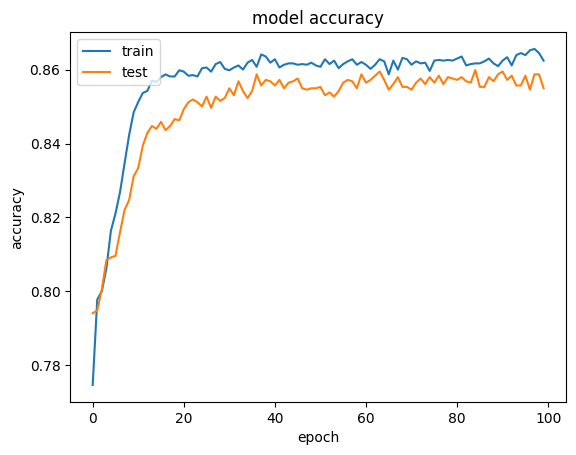

In [128]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Plot summarize history for loss

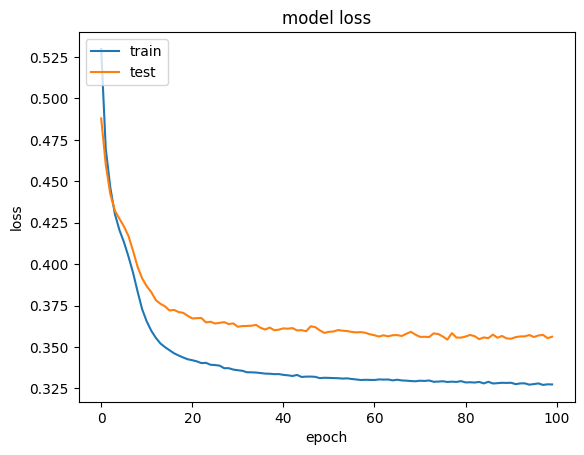

In [122]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Making the predictions and evaluating the model

In [123]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 3s 1ms/step


In [126]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1505   90]
 [ 192  213]]


In [127]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.859